In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
digits = load_iris()

In [3]:
# X features
X = pd.DataFrame(digits.data,columns=digits.feature_names)
X.head()
#Y target
y = digits.target

In [4]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print("X (features):")
print(X.head())

print("\nY (target labels):")
#print(y[:5])  # first 5 labels

X (features):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Y (target labels):


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [8]:
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [9]:
base_estimators = [
    ('dt',DecisionTreeClassifier(max_depth=30)),
    ('lr',LogisticRegression(C=0.001, penalty="l2", max_iter=1000, random_state=42))
]

In [10]:
from sklearn.ensemble import StackingClassifier
meta_model = StackingClassifier(estimators=base_estimators,final_estimator=LogisticRegression(),cv=10)

In [11]:
meta_model.fit(X_train,y_train)

,estimators,"[('dt', ...), ('lr', ...)]"
,final_estimator,LogisticRegression()
,cv,10
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,criterion,'gini'
,splitter,'best'
,max_depth,30
,min_samples_split,2


In [12]:
y_pred = meta_model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,y_pred)
#confusion_matrix = confusion_matrix(y_test,y_pred)
print("accuracy score :",a)
#print(confusion_matrix)

accuracy score : 0.8666666666666667


In [14]:
# Assuming meta_model is StackingClassifier
meta_model.fit(X_train, y_train)

# Access fitted estimators
for name, fitted_model in zip(meta_model.estimators, meta_model.estimators_):
    predictions = fitted_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)


0.8666666666666667
0.8666666666666667


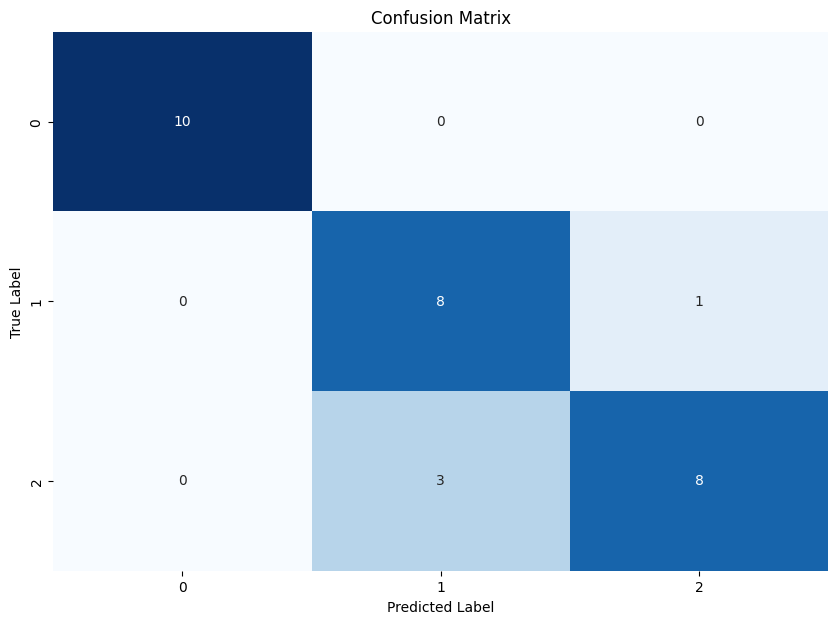


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.73      0.89      0.80         9
           2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model if not already done
meta_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = meta_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
